In [1]:
from google.colab import drive

drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/kaggle/"

!ls $DATA_DIR

Mounted at /content/drive
image-061.mhd  labels-061.mhd  MAMMOGRAPHY_PRESENTATION.dcm
image-061.raw  labels-061.raw


In [2]:
!pip install researchpy
!pip install SimpleITK
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import scipy.stats as stats
import researchpy
import os
%matplotlib inline
import SimpleITK as sitk

     |████████████████████████████████| 48.4 MB 19 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
image_file_m = 'MAMMOGRAPHY_PRESENTATION.dcm'
image_file_k= "image-061.mhd"

image_f_m= os.path.join(DATA_DIR, image_file_m)
image_f_k = os.path.join(DATA_DIR, image_file_k)

# Reading the image
img_m= sitk.ReadImage(image_f_m)
img_k= sitk.ReadImage(image_f_k)

In [4]:
# Checking the properities of the image for mamography
df = pd.DataFrame(columns=['Median','Mean', 'Max','Min','Variance','Sum','Count','Volume'])

label_stats = sitk.LabelStatisticsImageFilter()
label_shape = sitk.LabelShapeStatisticsImageFilter()

i_sp_m = img_m.GetSpacing()

label_stats.Execute(img_m, img_m> 0)  
# label_stats: is the filter here, mask is  here image> 0

st_median = label_stats.GetMedian(1)
st_mean = label_stats.GetMean(1)
st_max = label_stats.GetMaximum(1)
st_min = label_stats.GetMinimum(1)
st_var = label_stats.GetVariance(1)
st_sum = label_stats.GetSum(1)
st_count = label_stats.GetCount(1)

label_shape.Execute(img_m>0)

st_vol = label_shape.GetPhysicalSize(1)
#print(st_median, st_mean, st_max, st_min, st_var, st_sum,st_count,st_vol)
df.loc[len(df), :] = [st_median, st_mean, st_max, st_min, st_var, st_sum,st_count, st_vol]
print(df)
# max : 4095.0 means 2^12 : 12 bits of image not 8 bits.

        Median         Mean     Max  ...           Sum    Count      Volume
0  1287.685547  1262.258829  4095.0  ...  5166396356.0  4092977  20055.5873

[1 rows x 8 columns]


### Reading the Dicom tags

In [5]:
tags_to_print = {"0028|0030": "Pixel spacing tag: ", "0028|0100": "allocated tag: " }
for tag in tags_to_print:
        try:
          print(tags_to_print[tag] + img_m.GetMetaData(tag))
        except:  # Ignore if the tag isn't in the dictionary
          pass

Pixel spacing tag: 0.0700\0.0700 
allocated tag: 16


### Checking the properties of knee data in mhd (MetaImage MetaHeader file) format

In [6]:
# Checking the properities of the image for knee image
df = pd.DataFrame(columns=['Median','Mean', 'Max','Min','Variance','Sum','Count','Volume'])

label_stats = sitk.LabelStatisticsImageFilter()
label_shape = sitk.LabelShapeStatisticsImageFilter()

i_sp_k=img_k.GetSpacing()

label_stats.Execute(img_k, img_k> 0)
# label_stats: is the filter here, mask is  here image> 0

st_median = label_stats.GetMedian(1)
st_mean = label_stats.GetMean(1)
st_max = label_stats.GetMaximum(1)
st_min = label_stats.GetMinimum(1)
st_var = label_stats.GetVariance(1)
st_sum = label_stats.GetSum(1)
st_count = label_stats.GetCount(1)

label_shape.Execute(img_k>0)

st_vol = label_shape.GetPhysicalSize(1)
#print(st_median, st_mean, st_max, st_min, st_var, st_sum,st_count,st_vol)
df.loc[len(df), :] = [st_median, st_mean, st_max, st_min, st_var, st_sum,st_count, st_vol]
print(df)

      Median      Mean    Max  ...          Sum     Count          Volume
0  45.171875  64.54443  472.0  ...  667292004.0  10338491  1577528.533936

[1 rows x 8 columns]


In [22]:
'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, origin and spacing of the image.
'''

def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    array = sitk.GetArrayFromImage(itkimage)[0,:,:]
    plt.imshow(array, cmap=plt.cm.Greys_r)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return array, origin, spacing

In [19]:
'''
This function reads a '.dcm' file 
'''

def load_itk_m(image):
    array = sitk.GetArrayFromImage(image)[0,:,:]
    plt.imshow(array, cmap=plt.cm.Greys_r)
    print(image.GetSpacing())

(array([[ 3,  6,  4, ..., 93, 74, 51],
        [ 7,  5,  1, ..., 84, 65, 47],
        [ 9,  9,  7, ..., 75, 57, 45],
        ...,
        [ 1,  0,  1, ...,  3,  3,  6],
        [ 5,  4,  3, ...,  5,  3, 11],
        [ 8,  7,  5, ...,  8, 12, 14]], dtype=int16),
 array([-145.313 ,   27.7344,   21.0938]),
 array([1.      , 0.390625, 0.390625]))

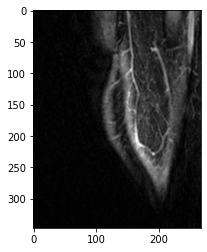

In [23]:
load_itk(image_f_k)

(0.07, 0.07, 1.0)


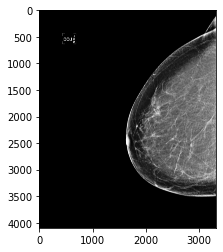

In [20]:
load_itk_m(img_m)